# Fruit Cocktail - Data Analysis 

This notebook hosts various analytic data for different patterns and applications. 


In [ ]:
# Required Imports 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import json
import datetime, time
from matplotlib.dates import date2num


This section hosts utility code.

In [ ]:
def convert_enddate_to_seconds(ts):
    """Takes ISO 8601 format(string) and converts into epoch time."""
    dt = datetime.datetime.strptime(ts[:-7],'%Y-%m-%dT%H:%M:%S')+\
                datetime.timedelta(hours=int(ts[-5:-3]),
                minutes=int(ts[-2:]))*int(ts[-6:-5]+'1')
    seconds = time.mktime(dt.timetuple()) + dt.microsecond/1000000.0
    return seconds

In [ ]:
def get_start_end(dataframe):
    start = dataframe.iloc[0]
    end = dataframe.iloc[-1]
    return start, end 

In [ ]:

def create_graph(x,y, time_interval, name_of_graph, start, end):
    # def clean_plot(data, metric):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(x, y)   # 2021-12-31T18:36:00+00:00 2021-12-31T19:05:00+00:00
    ax.axvspan(pd.to_datetime(start,unit='s'), 
               pd.to_datetime(end,unit='s'),
               color="green", alpha=0.3)


def convert_to_json(filename):
    # Opening JSON file
    f = open(filename)
    
    # returns JSON object as
    # a dictionary
    data = json.load(f)

    # Closing file
    f.close()
    return data

# returns 2 lists for average values, and timestamp
def get_list(timeseries):
    y = [val['average'] for val in timeseries]
    x = [pd.to_datetime(convert_enddate_to_seconds(val['timeStamp']),unit='s') for val in timeseries]
    return x,y

# 
def virtual_machine(filename, start, end):
    data = convert_to_json(filename)
    timespan = data['timespan']
    time_interval = data['interval']
    value = data['value'][0]
    name_of_graph = value['name']['value']
    timeseries = value['timeseries'][0]['data']
    x, y = get_list(timeseries)
    create_graph(x,y, time_interval, name_of_graph, start, end)



### Pineapple 

This section hosts data analatics part for Pattern 1 using Robot Shop as it's sample application. 

In [ ]:
# Import Data here 
root_directory = ".\pineapple"
directories = [name.path for name in os.scandir(root_directory) if it.is_dir()]
directories

['.\\pineapple\\API', '.\\pineapple\\junk', '.\\pineapple\\VM']

In [ ]:
# Standard_A1_v2
root_API = ".\pineapple\API\Standard_A1_v2"
root_VM  = ".\pineapple\VM\Standard_A1_v2"

# Set 1 
# set_1_API
# set_2_VM


In [ ]:
# Set 2 

In [ ]:
# Set 3 

In [ ]:
# Set 4

In [ ]:
# Set 5

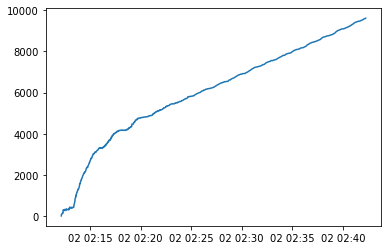

In [ ]:
v = 5
machine_type = "Standard_A4m_v2"
# API Metrics
test = f"./pineapple/API/{machine_type}/{v}/{machine_type}_load_stats_history.csv"
df = pd.read_csv(test)
start, end = get_start_end(df['Timestamp'])
df['Timestamp']= pd.to_datetime(df['Timestamp'] ,unit='s')

plt.plot(df["Timestamp"], df["Total Average Response Time"])
plt.show() 

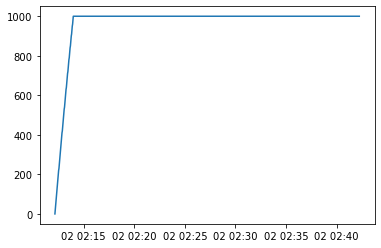

In [ ]:
plt.plot(df["Timestamp"], df["User Count"])
plt.show()

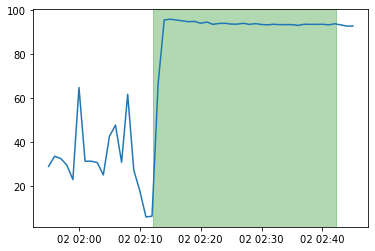

In [ ]:
# VM Metrics 
test_VM = f"./pineapple/VM/{machine_type}/{v}/percentageCPU_{v}.json"

virtual_machine(test_VM, start, end)